GOT cells was using python 2. 
Avatar and main functions now use python 3. 

Shouldn't be any changes, but no promises!

# Testing

In [1]:
import random
import math
import colorsys
# import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import json

%pylab inline
figsize(12,8)

Populating the interactive namespace from numpy and matplotlib


/Users/fredhohman/anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def display_colours(colours):
    colours = np.array(colours)
    figsize(13,2)
    N = colours.shape[0]
    for i,c in enumerate(colours):
        ax = subplot(1,N,(i+1), axisbg=c)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

[[0.32288661248874795, 0.4503778969092683, 0.8973394747753399], [0.3157853474433602, 0.6150849370626141, 0.21263204915043843], [0.4996221304602244, 0.06424517271331143, 0.627887977015921], [0.24007079835824818, 0.9015508610660565, 0.8025165002901102], [0.9043306367896333, 0.6713335855417037, 0.6463261437439576], [0.9449172269171644, 0.46089810109867335, 0.9561231429705823], [0.3121356287709388, 0.04393951179119304, 0.9723947322324725], [0.3484891444550803, 0.22222354073794615, 0.43654776933655026], [0.8415839343357258, 0.5891223508681636, 0.8929717480885919]]
<type 'list'>


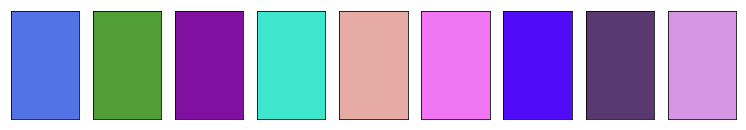

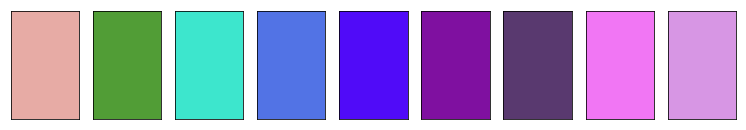

In [9]:
colours_length = 10
colours = []
for i in range(1, colours_length):
    colours.append (
        [
        random.random(),
        random.random(),
        random.random()
        ]
    )

print(colours)
print(type(colours))
display_colours(colours)

def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )

    h, s, v = colorsys.rgb_to_hsv(r,g,b)

    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)

    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum

    return (h2, lum, v2)

colours.sort(key=lambda (r,g,b): step(r,g,b,8))

# python 3
# .sort(key=lambda r_g_b: step(r_g_b[0],r_g_b[1],r_g_b[2],8))

# print(colours)
display_colours(colours)
# display_colours(colours)
# display_colours(colours)



# Top block "seasons"

In [10]:
data_path="/Users/fredhohman/Github/a-viz-of-ice-and-fire/data/color/seasons.json"
with open(data_path) as json_data:
    d = json.load(json_data)
    print len(d['palettes'])

6


In [17]:
d['palettes'][0];

In [20]:
for season in range(0,6):
    temp = d['palettes'][season]
    temp_np = np.array(temp)
    temp_np = temp_np / 255.0
    temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
    temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
    sorted_np = np.round(np.array(temp_list)*255.0)
    sorted_list = np.ndarray.tolist(sorted_np)
    d['palettes'][season] = sorted_list

[[4, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4], [8, 4, 4]]
[[107, 103, 87], [82, 88, 76], [138, 130, 110], [236, 243, 230], [186, 168, 130], [125, 117, 91], [230, 225, 176], [175, 168, 177], [92, 108, 87], [185, 180, 181]]
[[112, 107, 99], [207, 205, 227], [223, 203, 168], [196, 169, 146], [144, 136, 164], [31, 40, 35], [172, 152, 120], [147, 140, 196], [76, 60, 47], [76, 68, 44]]
[[223, 209, 170], [106, 103, 92], [158, 165, 206], [169, 149, 121], [131, 137, 153], [183, 190, 227], [24, 28, 28], [148, 148, 129], [60, 52, 45], [60, 60, 28]]
[[104, 104, 99], [204, 203, 223], [208, 181, 146], [162, 142, 110], [144, 142, 161], [36, 39, 56], [140, 151, 188], [72, 60, 58], [81, 76, 44], [176, 188, 172]]
[[209, 182, 115], [79, 74, 64], [149, 120, 84], [135, 143, 188], [97, 106, 127], [168, 174, 194], [118, 126, 133], [15, 16, 22], [38, 28, 59], [188, 108, 68]]


In [16]:
d['palettes'][0][:];

In [90]:
with open('/Users/fredhohman/Github/cs-7450/data/color/' + 'seasons_sorted.json', 'w') as outfile:
    json.dump(d, outfile)

# Middle block "series"

In [94]:
data_path="/Users/fredhohman/Github/cs-7450/data/color/series.json"
with open(data_path) as json_data:
    d = json.load(json_data)
    print len(d['palettes'])

60


In [95]:
for episode in range(0,60):
    temp = d['palettes'][episode]
    temp_np = np.array(temp)
    temp_np = temp_np / 255.0
    temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
    temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
    sorted_np = np.round(np.array(temp_list)*255.0)
    sorted_list = np.ndarray.tolist(sorted_np)
    d['palettes'][episode] = sorted_list

In [96]:
with open('/Users/fredhohman/Github/cs-7450/data/color/' + 'series_sorted.json', 'w') as outfile:
    json.dump(d, outfile)

# Bottom block "chunks"

In [105]:
def make_episode_list():
    
    episode_list = []

    for season_num in [1, 2, 3, 4, 5, 6]:
        for episode_num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            episode = 's' + str(season_num) + 'e' + str(episode_num)
            episode_list.append(episode)
    return episode_list

In [106]:
episode_list = make_episode_list()

60


In [112]:
for episode in episode_list:
    data_path="/Users/fredhohman/Github/cs-7450/data/color/" + episode + "_chunk.json"
    with open(data_path) as json_data:
        d = json.load(json_data)

    for chunk in range(0,60):
        temp = d['palettes'][chunk]
        temp_np = np.array(temp)
        temp_np = temp_np / 255.0
        temp_list = np.ndarray.tolist(temp_np)
    #     display_colours(temp_list)
        temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
    #     display_colours(temp_list)
        sorted_np = np.round(np.array(temp_list)*255.0)
        sorted_list = np.ndarray.tolist(sorted_np)
        d['palettes'][chunk] = sorted_list

    with open('/Users/fredhohman/Github/cs-7450/data/color/' + episode + '_chunk_sorted.json', 'w') as outfile:
        json.dump(d, outfile)

# title intro image

In [9]:
data_path="/Users/fredhohman/Github/cs-7450/intro.json"
with open(data_path) as json_data:
    d = json.load(json_data)

temp = d['palettes']
temp_np = temp_np / 255.0
temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
sorted_np = np.round(np.array(temp_list)*255.0)
sorted_list = np.ndarray.tolist(sorted_np)
d['palettes'][chunk] = sorted_list




[[[119, 64, 36], [57, 25, 16], [182, 129, 66], [220, 194, 114], [243, 246, 225], [237, 234, 164], [151, 121, 95], [188, 162, 148], [84, 84, 52], [196, 200, 188]]]


# Avatar

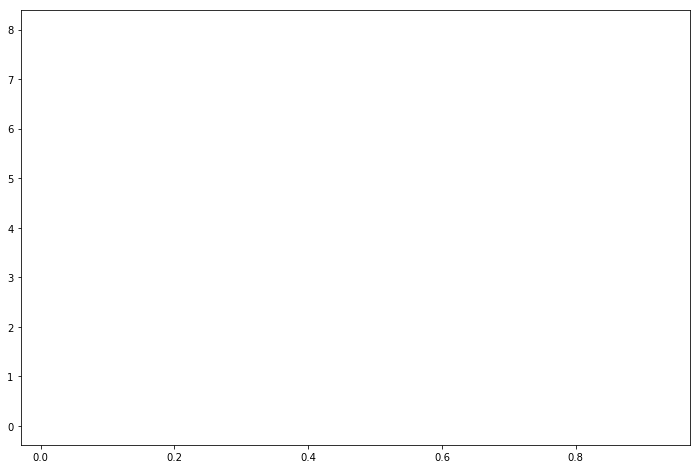

In [6]:
data_path="/Users/fredhohman/Github/a-viz-of-ice-and-fire/data/avatar/avatar.json"
with open(data_path) as json_data:
    d = json.load(json_data)

for frame in range(0, len(d['palettes']))[0:10]:
    
    temp = d['palettes'][frame]
    
    temp_np = np.array(temp)
    temp_np = temp_np / 255.0
    temp_list = np.ndarray.tolist(temp_np)
    
#     display_colours(temp_list)
    temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
    sorted_np = np.round(np.array(temp_list)*255.0)
    sorted_list = np.ndarray.tolist(sorted_np)
    d['palettes'][frame] = sorted_list

with open('/Users/fredhohman/Github/a-viz-of-ice-and-fire/data/avatar/rgb_test.json', 'w') as outfile:
    json.dump(d, outfile)

In [13]:
colours = colours.sort()
print(colours)

None
